# Classifying handwritten digits with deep networks

Here we explore how changing the architecture of a neural network impacts the performance of the network.  

## 1. Data preparations
Before we can build any neural networks we need to import a few things from Keras and prepare our data. The following code extracts the MNIST dataset, provided by Keras, and flattens the 28x28 pixel images into a vector with length 784. Additionally, it modifies the labels from a numeric value 0-9 to categorical class labels.

In [16]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Layer
from matplotlib import pyplot as plt
from random import randint


# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 2. A look at some random digits

It's a good idea to get a sense of the dataset we're working with. Run this code multple times to see new randomly selected digits from the training set. 

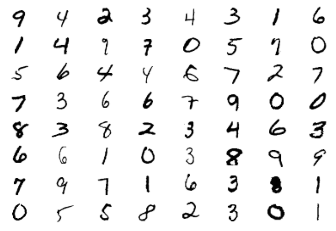

In [306]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

## 3. Visualizing weights in a single-layer network

In [144]:
model = Sequential()
out_layer = Dense(units=num_classes, activation='softmax', input_shape=(image_size,))
model.add(out_layer)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [212]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,  epochs=50, verbose=False, validation_data=(x_test, y_test))
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [292]:
loss, accuracy  = model.evaluate(x_train, y_train, verbose=False)
print(f'Train loss: {loss:.3}')
print(f'Train accuracy: {accuracy:.3}')

Train loss: 0.0331
Train accuracy: 0.994


In [293]:
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.0851
Test accuracy: 0.973


In [294]:
import numpy as np

output_weights = out_layer.get_weights()
arr = np.array(output_weights[0])
w = np.transpose(arr)
weights_per_label_long  = w.tolist()
w.shape

(10, 784)

In [295]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=4, verbose=False, validation_data=(x_test, y_test))

In [296]:
loss, accuracy  = model.evaluate(x_train, y_train, verbose=False)
print(f'Train loss: {loss:.3}')
print(f'Train accuracy: {accuracy:.3}')

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Train loss: 0.0278
Train accuracy: 0.996
Test loss: 0.0834
Test accuracy: 0.974


We do not exactly know what the network learns about each digit - the pixels of the same digit could be very different. But for a single-layer network we can visualize weights to see what the network leaned after 5 epochs. 
Each output node has a weight coming from every pixel.
For example, the output "2?" node has 784
input weights, each mapping the
relationship between a pixel and the
number "2". If the weight is high,
it means that the model believes
there's a high degree of correlation
between that pixel and the number 2. If the number is very low (negative),
then the network believes there is a very low correlation
(perhaps even negative correlation)
between that pixel and the number 2.
Thus, if we take our the matrix of weights for each pixel
and print it, we can "see" what network learned for a particular output node. 

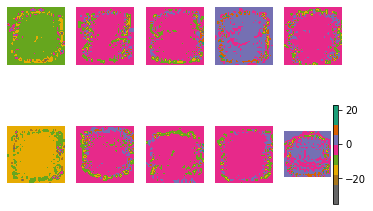

In [304]:
from  matplotlib import cm
output_weights = out_layer.get_weights()
arr = np.array(output_weights[0])
w = np.transpose(arr)
weights_per_label = w.tolist()
cmp = cm.get_cmap("Dark2_r", 10)
for i in range(len(weights_per_label)):
    a = np.array(weights_per_label[i])
    pixels = np.reshape(a, (28, 28))
    ax = plt.subplot(2, 5, i+1)
    ax.axis('off')
    plt.imshow(pixels, interpolation='bilinear',cmap=cmp)
plt.colorbar()


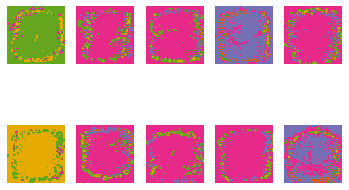

In [305]:
for i in range(len(weights_per_label_long)):
    a = np.array(weights_per_label_long[i])
    pixels = np.reshape(a, (28, 28))
    ax = plt.subplot(2, 5, i+1)
    ax.axis('off')
    plt.imshow(pixels, interpolation='bilinear', cmap=cmp)

## 4. Adding one hidden layer

Here is a first, simple network, to solve MNIST. It has a single hidden layer with 32 nodes.

In [262]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [291]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=False, validation_data=(x_test, y_test))
# history.history

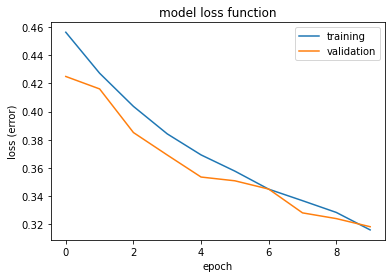

In [270]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss function')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [267]:
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.318
Test accuracy: 0.913


## 5. Preparing to run experiments 

There are a couple of things we're going to do repeatedly in this notebook: 

* Build a model, and
* Evaluate that model. 

These two functions will save us a bit of boilerplate overall. These functions will also help us compare "apples to apples" -- since we can be sure when we call `create_dense` and `evaluate` our models and training regimen will use the same hyperparameters. Both use some of the variables declared above, and both therefore are explicitly intended for working with the MNIST dataset.

`create_dense` accepts an array of layer sizes, and returns a Keras model of a fully connected neural network with the layer sizes specified. `create_dense([32, 64, 128])` will return a deeply connected neural net with three hidden layers, the first with 32 nodes, second with 64 nodes, and third with 128 nodes. 

`create_dense` uses the `image_size` variable declared above, which means it assumes the input data will be a vector with 784 units. All the hidden layers use the sigmoid activation function except the output layer, which uses softmax. 

`evaluate` prints a summary of the model, trains the model, and then prints the loss and accuracy. This function by default runs 10 training epochs and uses a fixed batch-size of 128 inputs per batch. It also uses the MNIST data extracted from Keras that we processed above.

In [279]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))

    return model

def evaluate(model, batch_size=128, epochs=10, title="", plot=True):
    print(title)
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    if plot:
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss function')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['training', 'validation'], loc='best')
        plt.show()

        print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


## 6. Comparing different architectures
### 6.1. Number of hidden layers

The following code trains and evaluates models with different numbers of hidden layers. All the hidden layers have 32 nodes. The first model has 1 hidden layer, the second as 2 ... up to four layers. 


In [280]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model, title="# of hidden layers = {}".format(layers), plot=False)
    print("=============================")
    print()

# of hidden layers = 1
Test loss: 0.388
Test accuracy: 0.899

# of hidden layers = 2
Test loss: 0.668
Test accuracy: 0.873

# of hidden layers = 3
Test loss: 1.63
Test accuracy: 0.502

# of hidden layers = 4
Test loss: 2.29
Test accuracy: 0.113



### 6.2. Deeper networks need more epochs

One of the factors at play above is that deeper networks take more time to train. This has to do with backpropogation, gradient descent, and the way optimization algorithms work -- those details are beyoned the scope of this notebook, but consider what happens when we let the 3 layer network that had mediocre performance above train for longer.

In [281]:
model = create_dense([32, 32, 32])
evaluate(model, epochs=100, plot=False)


Test loss: 0.274
Test accuracy: 0.924


### 6.2. Number of nodes per layer

Another way to add complexity is to add more nodes to each hidden layer. The following code creates several single layer neural networks, with increasingly more nodes in that layer. 

In [283]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_dense([nodes])
    evaluate(model, epochs=10, plot=False, title="# of nodes in the hidden layer = {}".format(nodes))
    print("=============================")
    print()

# of nodes in the hidden layer = 32
Test loss: 0.361
Test accuracy: 0.907

# of nodes in the hidden layer = 64
Test loss: 0.292
Test accuracy: 0.923

# of nodes in the hidden layer = 128
Test loss: 0.246
Test accuracy: 0.932

# of nodes in the hidden layer = 256
Test loss: 0.211
Test accuracy: 0.937

# of nodes in the hidden layer = 512
Test loss: 0.192
Test accuracy: 0.947

# of nodes in the hidden layer = 1024
Test loss: 0.167
Test accuracy: 0.952

# of nodes in the hidden layer = 2048
Test loss: 0.15
Test accuracy: 0.956



### 6.3. More layers and more nodes per layer

Now that we've looked at the number of nodes and the number of layers in an isolated context, lets look at what happens as we combine these two factors.

In [284]:
nodes_per_layer = 32
for layers in [1, 2, 3, 4, 5]:
    model = create_dense([nodes_per_layer] * layers)
    evaluate(model, epochs=10*layers, plot=False, 
             title="# of hidden layers = {} with {} nodes per layer and {} epochs".format(layers,nodes_per_layer, 10*layers))
    print("=============================")
    print()

# of layers = 1 with 32 nodes per layer
Test loss: 0.377
Test accuracy: 0.905

# of layers = 2 with 32 nodes per layer
Test loss: 0.4
Test accuracy: 0.908

# of layers = 3 with 32 nodes per layer
Test loss: 0.604
Test accuracy: 0.873

# of layers = 4 with 32 nodes per layer
Test loss: 1.29
Test accuracy: 0.631

# of layers = 5 with 32 nodes per layer
Test loss: 2.28
Test accuracy: 0.113



In [285]:
nodes_per_layer = 128
for layers in [1, 2, 3, 4, 5]:
    model = create_dense([nodes_per_layer] * layers)
    evaluate(model, epochs=10*layers, plot=False, 
             title="# of hidden layers = {} with {} nodes per layer and {} epochs".format(layers,nodes_per_layer, 10*layers))
    print("=============================")
    print()

# of hidden layers = 1 with 128 nodes per layer and 10 epochs
Test loss: 0.251
Test accuracy: 0.934

# of hidden layers = 2 with 128 nodes per layer and 20 epochs
Test loss: 0.248
Test accuracy: 0.933

# of hidden layers = 3 with 128 nodes per layer and 30 epochs
Test loss: 0.283
Test accuracy: 0.925

# of hidden layers = 4 with 128 nodes per layer and 40 epochs
Test loss: 0.414
Test accuracy: 0.9

# of hidden layers = 5 with 128 nodes per layer and 50 epochs
Test loss: 1.58
Test accuracy: 0.462



In [286]:
nodes_per_layer = 512
for layers in [1, 2, 3, 4, 5]:
    model = create_dense([nodes_per_layer] * layers)
    evaluate(model, epochs=10*layers, plot=False, 
             title="# of hidden layers = {} with {} nodes per layer and {} epochs".format(layers,nodes_per_layer, 10*layers))
    print("=============================")
    print()

# of hidden layers = 1 with 512 nodes per layer and 10 epochs
Test loss: 0.19
Test accuracy: 0.944

# of hidden layers = 2 with 512 nodes per layer and 20 epochs
Test loss: 0.202
Test accuracy: 0.942

# of hidden layers = 3 with 512 nodes per layer and 30 epochs
Test loss: 0.22
Test accuracy: 0.935

# of hidden layers = 4 with 512 nodes per layer and 40 epochs
Test loss: 0.248
Test accuracy: 0.934

# of hidden layers = 5 with 512 nodes per layer and 50 epochs
Test loss: 0.356
Test accuracy: 0.912



## 7. Smaller batches

Sometimes models with several layers need to not only train for longer, but also need more corrections per epoch. By decreasing the batch size, we can increase the number of overall corrections that a model gets. We also ensure it gets more fine grained information by adjusting to error over smaller batches. 

In this case, we can force a model that did not learn well in previous experiments to achieve a moderately respectable accuracy. The performance is still not great, but it's worth mentioning that with patience and computational power we can make a model that looked like total junk perform decently. 

Still our effort would probably be better spent on more promising models. 

In [289]:
model = create_dense([128] * 5)
evaluate(model, batch_size=16, epochs=50, plot=False)


Test loss: 0.399
Test accuracy: 0.889


## 8. Best 3-layer network with smaller batches

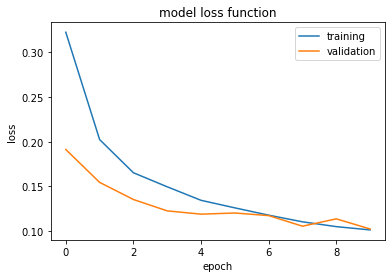


Test loss: 0.115
Test accuracy: 0.966


In [290]:
model = create_dense([2048] * 1)
evaluate(model, batch_size=16, epochs=10, plot=True)